<div class='alert alert-success'>
  
**Marking**

| Area              | Score |
|-------------------|-------|
| Problem Statement | 2/2   |
| Data Prep         | 2/2   |
| Methodology       | 2.5/3 |
| Insights          | 2.5/3 |
| Total             | 9 /10 |

Comments:
* Good work!  Thanks for sharing in class
* Even though it's word cloud visualizations, it can be insightful too!
* Kinda interesting that Trump did not appear prominently.  Guess my perception is wrong.  The media probably has a big part to play.
* Will be interesting to analyse media headlines during the same 3 days too, esp media that are aligned to each party.  E.g. Fox vs CNN
* Good job in explaining the 'surprising' insights!
</div>


### Research Topic: Analysis of COVID-19 tweets 

We are analysing the change in sentiments of tweets on Twitter in the world during the 3 time periods: initial spread, during its peak and the latest stage. We are interested in researching on COVID as it is an unprecedented time and we are currently in the midst of it, showcasing its relevance.

### Dataset and Data Preparation
**<u>Extraction of data </u>**

Using the list of twitter IDs we obtain from GitHub by Emily Chen, we extracted information by hydrating using the Hydrator (GUI) for tweets on the the initial spread, widespread infection and the date when the transmission of COVID has relatively stabilised. The dates chosen are 30 January, 20 March and 1 September respectively. On 30 January 2020, the WHO Director General declared the novel coronavirus outbreak a public health emergency of international concern (PHEIC), WHO's highest level of alarm.(https://www.who.int/emergencies/diseases/novel-coronavirus-2019/interactive-timeline#). 20 March 2020 was when COVID was really gaining traction with huge amounts of discussions online. Lastly, 1 September was when the virus has been made known to the public for a long period of time and the conditions have relatively stabilised. For each day, we extracted a total of 3 hours worth of tweets, 1 hour each from the start(UTC 00), middle(UTC 12), and end(UTC 23) of the day.

This Hydrator runs through the list of twitter IDs and extracts the information from Twitter’s search API on the dates (30 Jan, 20 Mar, 1 Sep) that we have specified (https://github.com/echen102/COVID-19-TweetIDs). The dataset generated from the Hydrator can be found below. This dataset includes tweet IDs associated with the novel coronavirus COVID-19 by a group of researchers  from the Information Sciences Institute, University of Southern California. The following table shows a sample list of keywords that are tracked in this dataset (https://publichealth.jmir.org/2020/2/e19273/).
<img src="https://i.imgur.com/z8MifWj.png" width =1000> 

**<u>Data preparation </u>**

Upon initial analysis, we realise that the data contains many irrelevant columns such as hashtags, in_reply_to_status_id and possibly_sensitive. We further extract the following rows: created_at, id, lang, retweet_count, tweet_url, source, text, user_verified. We will utilise these information for sentiment analysis on the text in the tweets itself. 

After extracting these columns, we realise that some rows contain text information in other languages. We then have to filter out the texts by filtering from the ‘lang’ column, which only contain English language due to the limitations of our analysis.

In [3]:
#pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
import warnings
warnings.filterwarnings('ignore')

import re
import pandas as pd
import glob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/edmundtay/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Reading Raw Data from the hydrated csvs and further process to the columns we need
STOP_WORDS = stopwords.words('english')

def filterword (x):
    desc = x.split()
    tokenized = []
    
    for stemmed_word in desc:
        tokenized.append(word_tokenize(stemmed_word))
    
    filtered = []
    
    #removing STOPWORDS
    for count in range (0, len(tokenized)):
        for word in tokenized[count]:
            if word.lower() not in STOP_WORDS:
                filtered.append(word.lower())  
    
    filtered_string = " ".join(filtered)
    return filtered_string
#Removing regular expression, https, rt and changing to lowercase
def cleaning (x):
    stage1 = re.sub(r'[^0-9a-zA-Z\ ]', '', x).lower()
    stage2 = stage1.lstrip("https")
    stage3 = stage2.lstrip("rt")
    stage4 = stage3.strip()
    return stage4

in_path =r'all-csv'
out_path = r'work'
in_filenames = glob.glob(in_path + "/*.csv")

for filename in in_filenames:
    fname_stg1 = filename.split(sep=".")
    fname = fname_stg1[0].split(sep="/")
    raw_data_df = pd.read_csv(filename)
    
    # Extracting relevant columns as stated above
    filtered_data_df = raw_data_df[['created_at', 
                                'id',
                                'user_location',
                                'source',
                                'lang', 
                                'favorite_count',
                                'retweet_count', 
                                'text']]
    
    # Basic cleaning on the ['text'] column to only contain alpha numeric characters
    filtered_data_df['text'] = filtered_data_df['text'].apply(cleaning)
    
    # filter only tweets in English
    filtered_data_en_df = filtered_data_df[filtered_data_df['lang'].str.match("en")]
    
    # filter with stop words removal 
    filtered_data_en_df['text_filtered'] = filtered_data_en_df['text'].apply(filterword)
    
    filtered_data_en_df.to_csv("work/" + fname[1] + "_proc.csv")

In [3]:
# Preparing for Sentiment Analysis
sid = SentimentIntensityAnalyzer()

analysis_in_path = r'work'
analysis_in_filenames = glob.glob(analysis_in_path + "/*.csv")

for filename in analysis_in_filenames:
    fname_stg1 = filename.split(sep=".")
    fname = fname_stg1[0].split(sep="/")
    analyzed_data_en_df = pd.read_csv(filename)
    
    print("Analyzing Sentiment " + filename + " Started")
    
    compound = []
    positive = []
    neutral = []
    negative = []

    for sentence in analyzed_data_en_df['text_filtered']:
        ss = sid.polarity_scores(sentence)
        compound.append(ss['compound'])
        positive.append(ss['pos'])
        neutral.append(ss['neu'])
        negative.append(ss['neg'])    

    analyzed_data_en_df['Compound'] = compound
    analyzed_data_en_df['Positive'] = positive
    analyzed_data_en_df['Neutral'] = neutral
    analyzed_data_en_df['Negative'] = negative        
    
    analyzed_data_en_df.to_csv("analyzed/" + fname[1] + "_analyzed.csv")
    print("Analyzing Sentiment " + filename + " Ended")

Analyzing Sentiment work/coronavirus-tweet-id-2020-01-30-12_proc.csv Started
Analyzing Sentiment work/coronavirus-tweet-id-2020-01-30-12_proc.csv Ended
Analyzing Sentiment work/coronavirus-tweet-id-2020-09-01-12_proc.csv Started
Analyzing Sentiment work/coronavirus-tweet-id-2020-09-01-12_proc.csv Ended
Analyzing Sentiment work/coronavirus-tweet-id-2020-03-20-12_proc.csv Started
Analyzing Sentiment work/coronavirus-tweet-id-2020-03-20-12_proc.csv Ended
Analyzing Sentiment work/coronavirus-tweet-id-2020-03-20-00_proc.csv Started
Analyzing Sentiment work/coronavirus-tweet-id-2020-03-20-00_proc.csv Ended
Analyzing Sentiment work/coronavirus-tweet-id-2020-09-01-23_proc.csv Started
Analyzing Sentiment work/coronavirus-tweet-id-2020-09-01-23_proc.csv Ended
Analyzing Sentiment work/coronavirus-tweet-id-2020-09-01-00_proc.csv Started
Analyzing Sentiment work/coronavirus-tweet-id-2020-09-01-00_proc.csv Ended
Analyzing Sentiment work/coronavirus-tweet-id-2020-03-20-23_proc.csv Started
Analyzing S

In [4]:
# Merging CSVs by pre-, during- and post-COVID data

pre_csv_1 = pd.read_csv("analyzed/coronavirus-tweet-id-2020-01-30-23_proc_analyzed.csv")
pre_csv_2 = pd.read_csv("analyzed/coronavirus-tweet-id-2020-01-30-00_proc_analyzed.csv")
pre_csv_3 = pd.read_csv("analyzed/coronavirus-tweet-id-2020-01-30-12_proc_analyzed.csv")

pre_csv_merge = pd.concat ([pre_csv_1, pre_csv_2, pre_csv_3])
pre_csv_merge.to_csv("analyzed/merge/coronavirus-tweet-id-2020-01-30_analyzed.csv")

during_csv_1 = pd.read_csv("analyzed/coronavirus-tweet-id-2020-03-20-23_proc_analyzed.csv")
during_csv_2 = pd.read_csv("analyzed/coronavirus-tweet-id-2020-03-20-00_proc_analyzed.csv")
during_csv_3 = pd.read_csv("analyzed/coronavirus-tweet-id-2020-03-20-12_proc_analyzed.csv")

during_csv_merge = pd.concat ([during_csv_1, during_csv_2, during_csv_3])
during_csv_merge.to_csv("analyzed/merge/coronavirus-tweet-id-2020-03-20_analyzed.csv")

post_csv_1 = pd.read_csv("analyzed/coronavirus-tweet-id-2020-09-01-23_proc_analyzed.csv")
post_csv_2 = pd.read_csv("analyzed/coronavirus-tweet-id-2020-09-01-00_proc_analyzed.csv")
post_csv_3 = pd.read_csv("analyzed/coronavirus-tweet-id-2020-09-01-12_proc_analyzed.csv")

post_csv_merge = pd.concat ([post_csv_1, post_csv_2, post_csv_3])
post_csv_merge.to_csv("analyzed/merge/coronavirus-tweet-id-2020-09-01_analyzed.csv")

In [5]:
# Averaging the sentiment analysis to find the mean sentiment analysis for each respective period
pre_csv_merge = pd.read_csv('analyzed/merge/coronavirus-tweet-id-2020-01-30_analyzed.csv')
pre_mean=pre_csv_merge['Compound'].mean()
print('mean of sentiment analysis during pre-COVID period is', pre_mean)

during_csv_merge = pd.read_csv('analyzed/merge/coronavirus-tweet-id-2020-03-20_analyzed.csv')
during_mean=during_csv_merge['Compound'].mean()
print('mean of sentiment analysis during during-COVID period is', during_mean)

post_csv_merge = pd.read_csv('analyzed/merge/coronavirus-tweet-id-2020-09-01_analyzed.csv')
post_mean=post_csv_merge['Compound'].mean()
print('mean of sentiment analysis during post-COVID period is', post_mean)

mean of sentiment analysis during pre-COVID period is -0.05616828899788561
mean of sentiment analysis during during-COVID period is 0.00042841888289625314
mean of sentiment analysis during post-COVID period is -0.05795901283653077


Plotting -  analyzed/merge/coronavirus-tweet-id-2020-03-20_analyzed.csv
Plotting -  analyzed/merge/coronavirus-tweet-id-2020-09-01_analyzed.csv
Plotting -  analyzed/merge/coronavirus-tweet-id-2020-01-30_analyzed.csv


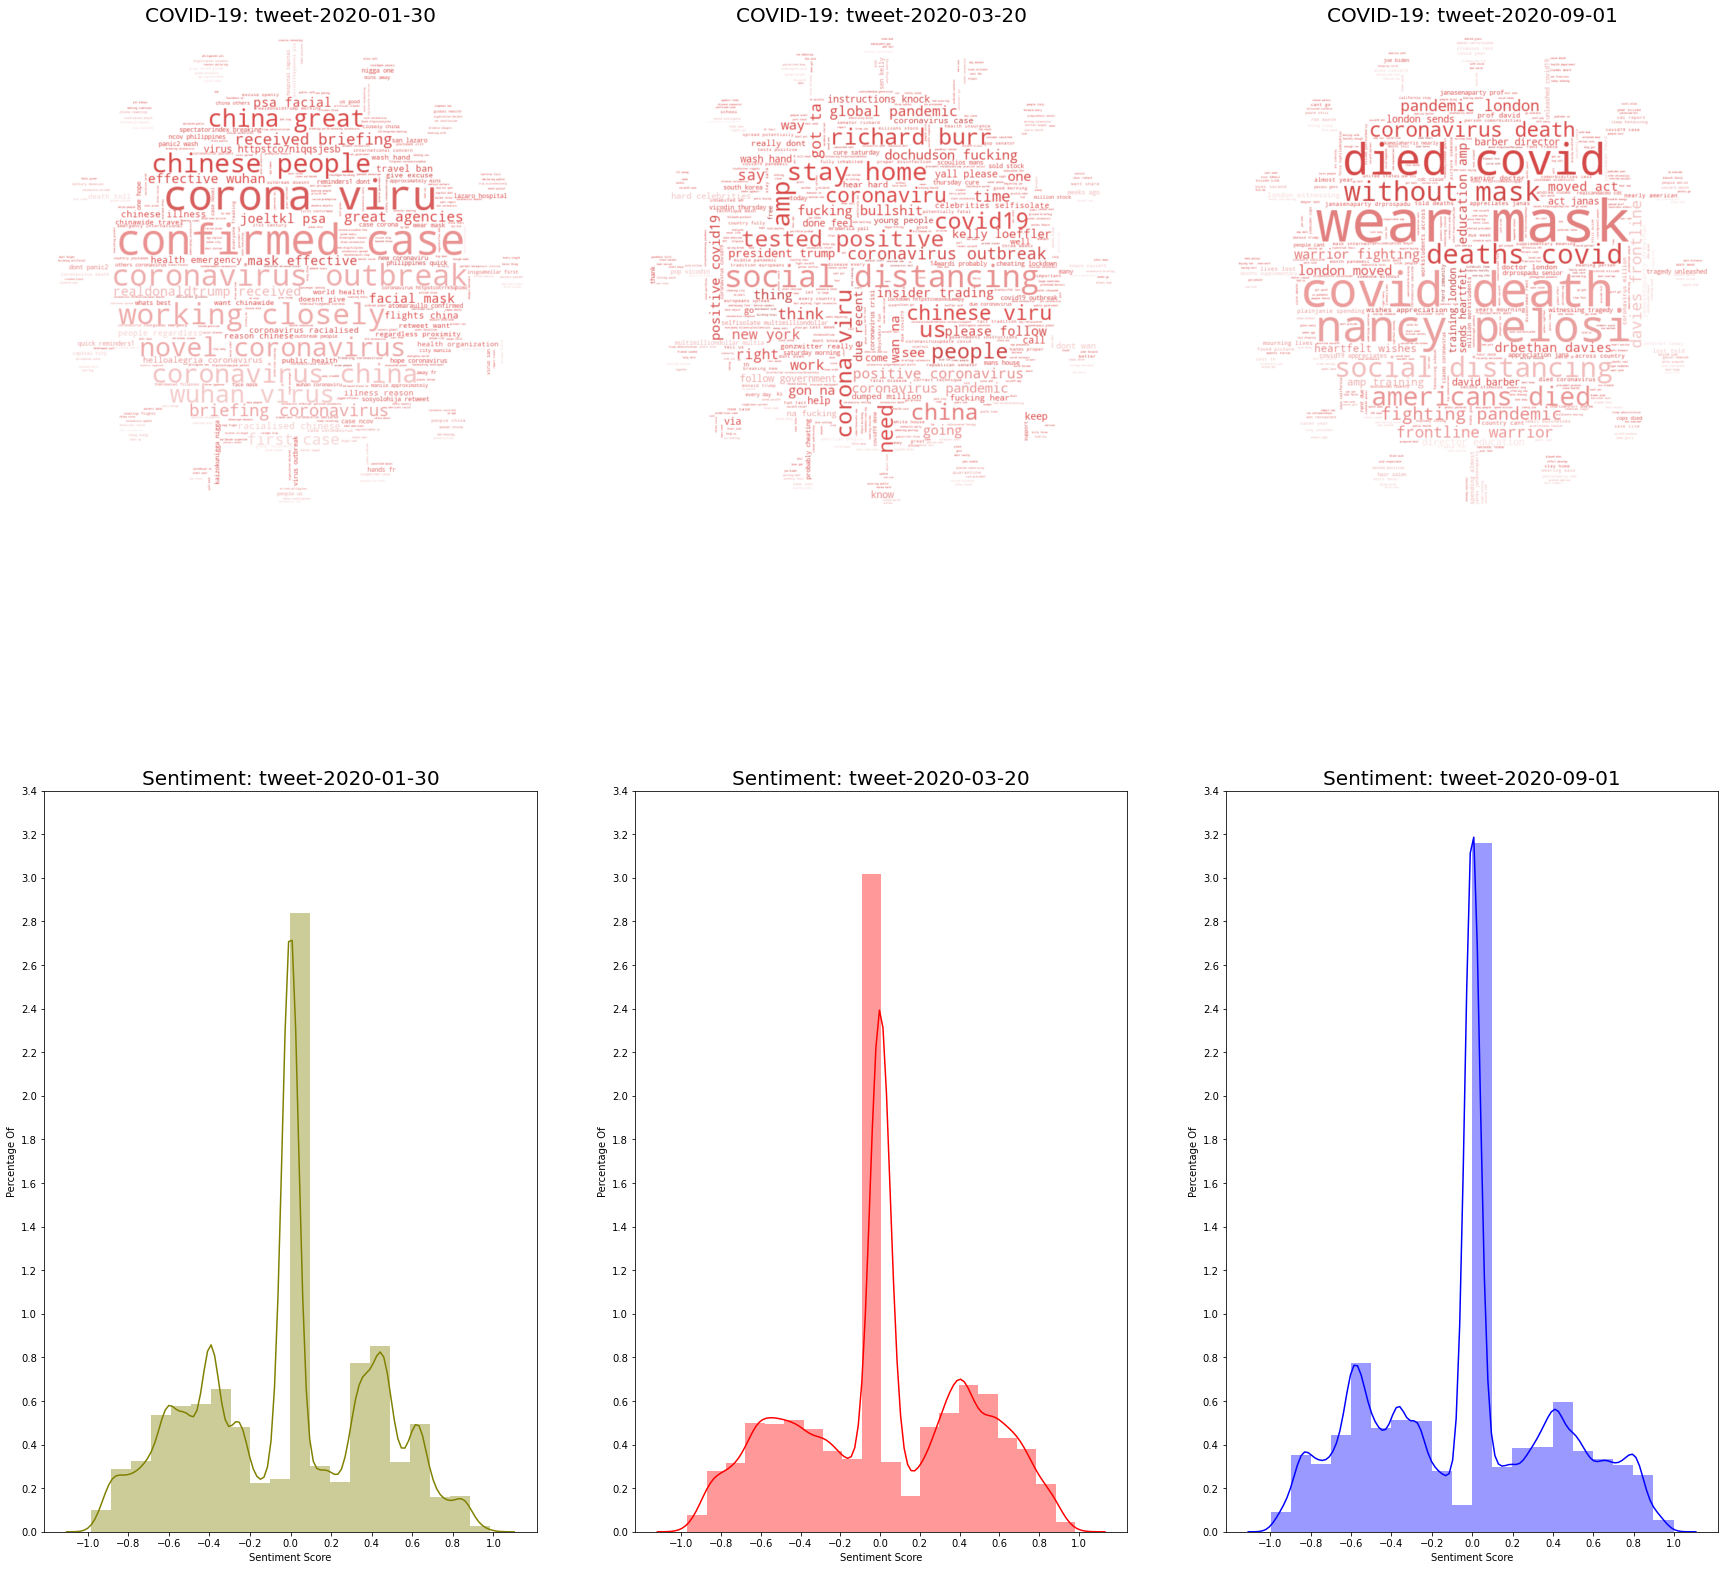

In [4]:
# String all the text in the tweets together for word cloud
wordcloud_in_path = r'analyzed/merge'
wordcloud_in_filenames = glob.glob(wordcloud_in_path + "/*.csv")

plt.figure(figsize=(30,30)) 
#gs = gridspec.GridSpec(2, 2,height_ratios=[1,2])

# Codes for Word Cloud and Distribution Plot Generation
for filename in wordcloud_in_filenames:
    fname_stg1 = filename.split(sep="_analyzed.")
    fname = fname_stg1[0].split(sep="/")
    
    period = fname[2].split(sep="-")
    plot_title = period[1] + "-" + period[3] + "-" + period[4] + "-" + period[5]
    
    print ("Plotting - ", filename)
    data = []
    wordcloud_data_df = pd.read_csv(filename)
    wordcloud_text_df = wordcloud_data_df['text_filtered']
    for row in wordcloud_text_df:
        data.append(row)

    def listToString(data):
        str1 = " " 
        return (str1.join(data)) 
    
    text = listToString(data)

    # Generate a word cloud image using the shape of a (corona)virus
    mask = np.array(Image.open("corona2.png"))
    wordcloud_spa = WordCloud(background_color="white", max_words=1000, mask=mask).generate(text)

    wordcloud = WordCloud().generate(text)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text) 
    image_colors = ImageColorGenerator(mask)
    
    if "2020-01-30" in plot_title:
        index = 1
        # Create coloring from image
        plt.subplot(2, 3, index).set_title("COVID-19: " + plot_title, fontsize=20)
        plt.plot()
        plt.imshow(wordcloud_spa.recolor(color_func=image_colors), interpolation="bilinear")
        plt.axis("off")  
    
        # Plotting Sentiment for COVID19 for pre-COVID
        plt.subplot(2, 3, index+3).set_title("Sentiment: " + plot_title,fontsize=20)
        plt.plot()
        sns.distplot(a=wordcloud_data_df['Compound'], bins=20, color='olive')
        plt.xlabel("Sentiment Score")
        plt.xticks(np.arange(-1.0,1.1,0.2))
        plt.ylabel("Percentage Of")
        plt.yticks(np.arange(0,3.5,0.2))
    elif "2020-03-20" in plot_title:
        index = 2
        # Create coloring from image
        plt.subplot(2, 3, index).set_title("COVID-19: " + plot_title, fontsize=20)
        plt.plot()
        plt.imshow(wordcloud_spa.recolor(color_func=image_colors), interpolation="bilinear")
        plt.axis("off")  
    
        # Plotting Sentiment for COVID19 for during-COVID
        plt.subplot(2, 3, index+3).set_title("Sentiment: " + plot_title, fontsize=20)
        plt.plot()
        sns.distplot(a=wordcloud_data_df['Compound'], bins=20, color='red')
        plt.xlabel("Sentiment Score")
        plt.xticks(np.arange(-1.0,1.1,0.2))
        plt.ylabel("Percentage Of")
        plt.yticks(np.arange(0,3.5,0.2))
    elif "2020-09-01" in plot_title:
        index = 3
        # Create coloring from image
        plt.subplot(2, 3, index).set_title("COVID-19: " + plot_title, fontsize=20)
        plt.plot()
        plt.imshow(wordcloud_spa.recolor(color_func=image_colors), interpolation="bilinear")
        plt.axis("off")  
    
        # Plotting Sentiment for COVID19 for post-COVID
        plt.subplot(2, 3, index+3).set_title("Sentiment: " + plot_title,fontsize=20)
        plt.plot()
        sns.distplot(a=wordcloud_data_df['Compound'], bins=20, color='blue')
        plt.xlabel("Sentiment Score")
        plt.xticks(np.arange(-1.0,1.1,0.2))
        plt.ylabel("Percentage Of")        
        plt.yticks(np.arange(0,3.5,0.2))
        
plt.savefig("covid19_sentiment_analysis.png")
plt.show()    


**<u> Analysis of Wordcloud (30th January) </u>**

<img src="https://i.imgur.com/R7rkDxA.png?1" width =700> 

The tweets on 30th January appeared to be racially focused on the Chinese and geographically centred around China. This was not unexpected, given that the virus was still relatively isolated. Words like death toll were not as prominent as words like “First Case”, “Mask Effective” “travel ban” and “don’t panic”. These words indicated that many people were apprehensive of the new virus and wanted stricter border control measures to limit the spread of the virus. It also showed the community’s effort to limit the spread by promoting the use of masks. 

During this particular time, Joeltkl psa tweet was spreading like wild fire. This contributed to several prominent words like ‘PSA facial’ and ‘Joeltkl PSA’ . While humorous, it reinforced the point that the general mood during this period of time was of apprehension as people were taking precautions to protect themselves. His tweet is reproduced in full below.
  
<img src="https://i.imgur.com/7HzeKpi.jpg" width =500> 

Interestingly, this wordcloud also highlights the different names assigned to the virus. This includes:
<UL>
    <LI>corona viru
    <LI>outbreak
    <LI>coronavirus china   
    <LI>wuhan virus
    <LI>nCov
</UL>
These different names seem to also reflect the chaos and messiness of the pandemic as it started gaining traction across the globe, especially in Western media(due to larger proportion of Twitter users originating from US/UK/Europe). 

**<u> Analysis of Wordcloud (20th March) </u>**

<img src="https://i.imgur.com/MlPjgbI.png?1" width =700> 

20th March represented a period of time when countries were starting to impose strict safe distancing measures to curb the spread of the virus. Words like Social Distancing, Pandemic and Tested Positive were extremely prominent, showing the extent of how lives were being altered as a result of this new disease. Apart from reflecting the general mood, the wordcloud is also capable of showing the less noticable conseuqneces of the pandemic. For example, the word ‘Insider Trading’ is extremely prominent, a reference to United States Senator Richard Burr and several other government officials, who were implicated for insider trading through the use of privileged information about the COVID19 pandemic. 

People were generally fearful and took to twitter to encourage others to stay at home. Words like "Fucking Bullshit" also reflected unhappiness about how the virus was uprooting lives. Shortly after 20th March, stock markets around the world plummeted, as investors became fearful of the virus and the conseuqneces it would have on the future profitability of businesses. 

**<u> Analysis of Wordcloud (1st September) </u>**

<img src="https://i.imgur.com/ObbuLPO.png" width =700> 

1st September appeared to be a grim day with many prominent words such as “death” and “Coronavirus death”. It is obvious that the virus is extremely widespread, as geographically focused words like “China” have been replaced by words like “London” and “America”. This could also be a reference to the different 'second waves' of COVID-19 hitting these countries or cities. Frontline workers, masks and social distancing appeared to be the subject of many tweets, showing that people were encouraging others to do the right thing to curb the spread of the virus. On this day, Nancy Pelosi (Speaker of the house of represntatives, US) made headlines for attempting to reach a bi-partisan agreenment on the COVID relief package that would help to provide some economic respite in America. 

**<u> Summary on the Analysis of the wordcloud </u>**

The results above did not suprise our team as the tweets were representative of our view on how the mood of the virus shifted between 30th January to 1st September. Regardless, we were able to gain insights into what was happening on the day itself and how such events were the result of the virus spreading within communities.

However, since our wordclouds were derived from the content of the tweets for these particular days, the content that we are analysing are more specific to the day itself instead of an overarching time period. However, using singular days as a proxy for the differing stages of Covid is still useful in providing us a brief snapshot of how the public perception of Covid-19 has evolved over time. Moving past an initial highly racialised and chaotic reaction of Twitter users in January, we were able to glimpse at the mitigatory and also relatively negative emotions of the public in March. Our final stage eventually highlights a sombre culmination of the different repercussions of the pandemic in September.  

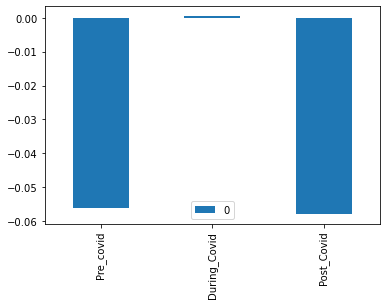

In [8]:
#plotting of average sentiments during each time period
df = pd.DataFrame(index=['Pre_covid','During_Covid','Post_Covid'],data=[pre_mean,during_mean,post_mean])
df.plot(kind='bar')

**<u>Results of Sentiment Analysis </u>**

The results we obtained from analyzing the tweets were unexpected. From a visual analysis of the word cloud, we expected the mean for the sentiment analysis to be negative for all 3 periods, with during and post covid having the lowest mean (indicating extreme negative sentiments). From our analysis, the compound mean for pre-COVID was the lowest (-0.056), with the compound mean for during-COVID being the highest (0.00043) indicating positive sentiment. 

Our team reconciled that it may be due to a limitation of the Natural Language Toolkit that we used for sentiment analysis. This toolkit was developed in 2001, which suggests that the sentiment analysis is entirely not accurate in today’s context. This may include its (in)ability to properly detect more novel words(that may also be of more negative sentiment) such as 'coronavirus', or 'quarantine'. Thus, in its detection, these new words could have been mistaken as largely neutral, thus accounting for the overwhelmingly percentage of neutral scores. This large proportion of neutral scores ultimately affected the representativeness of the overall sentiment analysis in the above figure, possibly reducing its negativity score.

**<u>Current Limitations & Going Forward </u>**

One limitation of our analysis is that we are using data from tweets of 3 specific hours in a day to represent each phase of COVID. Going forward, future research efforts should be focused on analysing data spanning across weeks to accurately determine the change in sentiments of the public. 

Besides that, we have only analysed tweets that are in English, which may not be representitive of the sentiments of the international community. Hence, future efforts can focus on other languagues, such as Arabic and French. 

Lastly, we were only able to extract data from public Twitter accounts. This naturally excludes private or deleted Tweets, which implies less representative data. Also, Twitter is banned in China and thus our findings are not likely to be able to represent public sentiment on a global scale. To counter this, we can consider using data from more diverse sources, such as Weibo, Facebook, Reddit,and Quora, in order to provide better insights on how people are reacting to COVID-19.

**<u>Prepared By </u>**

Team 2

Comprising of:

Hoon Tian Jun, Terrence

Jonathan Lee

Lim Yi Torng

Tay Zhi Xiang, Edmund

Wei Shin Ng